In [1]:
# !pip install fasttext
# !pip install keras-tuner
# !pip install pymoo
# !pip install binance
# !pip install binance-futures-connector
# !pip install joblib
# !pip install scikit-learn==1.4.2
# !pip install ta_lib-0.4.25-cp311-cp311-win_amd64.whl

In [2]:
import pandas as pd
import numpy as np
import requests
import fasttext
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from binance.um_futures import UMFutures

# Reading datsets

In [3]:
# Lost data :(
# names_symbols = pd.read_csv(r'C:\Cloud\filips19mail\github\solanaDEXtokenCollector\data\names_and_symbols.csv')
# names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
# names_symbols.reset_index(drop=True, inplace=True)
# names_symbols

In [4]:
df = pd.read_csv('data/tokens_raw.csv')
df.drop_duplicates(subset=['pairAddress'], inplace=True)
df = df.loc[df['worthy'] != -1]
df

,chainId,dexId,url,pairAddress,baseTokenAddress,baseTokenName,baseTokenSymbol,quoteTokenAddress,quoteTokenName,quoteTokenSymbol,...,BTCUSDT_RSI_4h,BTCUSDT_ULTOSC_4h,BTCUSDT_TSF_4h,BTCUSDT_ADOSC_1d,BTCUSDT_OBV_1d,BTCUSDT_ATR_1d,BTCUSDT_RSI_1d,BTCUSDT_ULTOSC_1d,BTCUSDT_TSF_1d,worthy
0,solana,raydium,https://dexscreener.com/solana/fufvvnedkwd1ay9...,FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM,4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r,FIZZ CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,64.667694,57.435246,66133.097802,281906.531362,-7.167427e+06,3582.065357,51.033036,61.629843,62576.293407,0
1,solana,raydium,https://dexscreener.com/solana/7kgyryt4f6swhge...,7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS,A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo,FIZZ THE CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,64.766410,57.623686,66137.897802,282858.088122,-7.167264e+06,3582.065357,51.070632,61.682576,62581.093407,0
2,solana,raydium,https://dexscreener.com/solana/3jmhcpdsabsvvwv...,3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT,EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc,Angry Cat,Angry Cat,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,64.889033,57.859236,66143.897802,284088.267410,-7.166894e+06,3582.065357,51.117545,61.748493,62587.093407,0
3,solana,raydium,https://dexscreener.com/solana/87pyekwlyzywj5x...,87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7,3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs,Courage the Cowardly Dog,CCD,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,64.920427,57.919806,66145.440659,284402.661175,-7.166809e+06,3582.065357,51.129594,61.765443,62588.636264,0
4,solana,raydium,https://dexscreener.com/solana/ftdsownvjufsblk...,FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob,J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7,DOP DOP YES YES,SKIPIDY,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,64.851753,57.787449,66142.069231,284300.727171,-7.166731e+06,3582.065357,51.124686,61.758537,62588.007692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42423,solana,raydium,https://dexscreener.com/solana/56igkhvs4gqqg9m...,56iGkHvS4GqQG9Myb5CZuoYFCGjKt9r3PVSxy9DjEtcc,G9g1UB27NgVwnb9ivNBHtwRfbzy4VNrDhcnBkMqMpump,jeff,$jeff,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,37.858980,40.657506,60990.483516,-139273.845070,-1.041816e+07,2053.204506,32.337411,38.425577,59779.759341,0
42424,solana,raydium,https://dexscreener.com/solana/che4zpd7hur1jft...,ChE4ZPD7hUr1JFTkbq6FSWKsAgYjUs6ZrCYaQASgUURY,9iGeLbg5pGwACuR4itmJxJoYoPGoM3UzzAY4uTi64FQ8,GRIMACEX,GRIMACEX,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,37.766897,40.537518,60988.226374,-139720.119244,-1.041818e+07,2053.204506,32.318480,38.384801,59777.502198,0
42425,solana,raydium,https://dexscreener.com/solana/gxjq1fzzvvngdpy...,GxJq1fZZVVNgdPYMbf6VXjCRwAJy9Q9eK2wc16411nn5,EqmYCTjJdhBiBm2TunniDguCf3vzBSro5io3Xdar67cJ,Bear Of Wall Street,BOWS,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,37.989062,40.827617,60993.683516,-138460.906407,-1.041826e+07,2053.204506,32.373417,38.502999,59784.045055,0
42426,solana,meteora,https://dexscreener.com/solana/6rsfgr3hyvtr2ij...,6RSFGr3HyVtR2ijvmAHSr8XdYEUBnDTYRmt3YyAp3YdD,DaYYrQTtKqGCBiPtnXSUT5d8nDXBrtW5LoJHsg4opump,meesa,meesa,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,38.033074,40.885333,60994.769231,-138454.493616,-1.041829e+07,2053.204506,32.373898,38.504031,59784.102198,0


In [5]:
df.reset_index(drop=True, inplace=True)
df['liq_fdv_ratio'] = (df['liquidity_usd']/df['fdv']).replace([np.inf, -np.inf], 0).fillna(0)
df

,chainId,dexId,url,pairAddress,baseTokenAddress,baseTokenName,baseTokenSymbol,quoteTokenAddress,quoteTokenName,quoteTokenSymbol,...,BTCUSDT_ULTOSC_4h,BTCUSDT_TSF_4h,BTCUSDT_ADOSC_1d,BTCUSDT_OBV_1d,BTCUSDT_ATR_1d,BTCUSDT_RSI_1d,BTCUSDT_ULTOSC_1d,BTCUSDT_TSF_1d,worthy,liq_fdv_ratio
0,solana,raydium,https://dexscreener.com/solana/fufvvnedkwd1ay9...,FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM,4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r,FIZZ CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,57.435246,66133.097802,281906.531362,-7.167427e+06,3582.065357,51.033036,61.629843,62576.293407,0,0.0
1,solana,raydium,https://dexscreener.com/solana/7kgyryt4f6swhge...,7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS,A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo,FIZZ THE CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,57.623686,66137.897802,282858.088122,-7.167264e+06,3582.065357,51.070632,61.682576,62581.093407,0,0.0
2,solana,raydium,https://dexscreener.com/solana/3jmhcpdsabsvvwv...,3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT,EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc,Angry Cat,Angry Cat,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,57.859236,66143.897802,284088.267410,-7.166894e+06,3582.065357,51.117545,61.748493,62587.093407,0,0.0
3,solana,raydium,https://dexscreener.com/solana/87pyekwlyzywj5x...,87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7,3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs,Courage the Cowardly Dog,CCD,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,57.919806,66145.440659,284402.661175,-7.166809e+06,3582.065357,51.129594,61.765443,62588.636264,0,0.0
4,solana,raydium,https://dexscreener.com/solana/ftdsownvjufsblk...,FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob,J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7,DOP DOP YES YES,SKIPIDY,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,57.787449,66142.069231,284300.727171,-7.166731e+06,3582.065357,51.124686,61.758537,62588.007692,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42423,solana,raydium,https://dexscreener.com/solana/56igkhvs4gqqg9m...,56iGkHvS4GqQG9Myb5CZuoYFCGjKt9r3PVSxy9DjEtcc,G9g1UB27NgVwnb9ivNBHtwRfbzy4VNrDhcnBkMqMpump,jeff,$jeff,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,40.657506,60990.483516,-139273.845070,-1.041816e+07,2053.204506,32.337411,38.425577,59779.759341,0,0.0
42424,solana,raydium,https://dexscreener.com/solana/che4zpd7hur1jft...,ChE4ZPD7hUr1JFTkbq6FSWKsAgYjUs6ZrCYaQASgUURY,9iGeLbg5pGwACuR4itmJxJoYoPGoM3UzzAY4uTi64FQ8,GRIMACEX,GRIMACEX,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,40.537518,60988.226374,-139720.119244,-1.041818e+07,2053.204506,32.318480,38.384801,59777.502198,0,0.0
42425,solana,raydium,https://dexscreener.com/solana/gxjq1fzzvvngdpy...,GxJq1fZZVVNgdPYMbf6VXjCRwAJy9Q9eK2wc16411nn5,EqmYCTjJdhBiBm2TunniDguCf3vzBSro5io3Xdar67cJ,Bear Of Wall Street,BOWS,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,40.827617,60993.683516,-138460.906407,-1.041826e+07,2053.204506,32.373417,38.502999,59784.045055,0,0.0
42426,solana,meteora,https://dexscreener.com/solana/6rsfgr3hyvtr2ij...,6RSFGr3HyVtR2ijvmAHSr8XdYEUBnDTYRmt3YyAp3YdD,DaYYrQTtKqGCBiPtnXSUT5d8nDXBrtW5LoJHsg4opump,meesa,meesa,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,40.885333,60994.769231,-138454.493616,-1.041829e+07,2053.204506,32.373898,38.504031,59784.102198,0,0.0


# Names and symbols embedding models

In [6]:
# names_symbols = pd.concat([names_symbols, df[['baseTokenName', 'baseTokenSymbol']]], axis=0)
names_symbols = df[['baseTokenName', 'baseTokenSymbol']]
names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
names_symbols.reset_index(drop=True, inplace=True)
names_symbols['baseTokenName'] = names_symbols['baseTokenName'].str.lower()
names_symbols['baseTokenSymbol'] = names_symbols['baseTokenSymbol'].str.lower()
names_symbols

C:\Users\philipz\AppData\Local\Temp\ipykernel_5296\2444019040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_symbols.drop_duplicates(subset=['baseTokenName'], inplace=True)
C:\Users\philipz\AppData\Local\Temp\ipykernel_5296\2444019040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_symbols['baseTokenName'] = names_symbols['baseTokenName'].str.lower()
C:\Users\philipz\AppData\Local\Temp\ipykernel_5296\2444019040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,baseTokenName,baseTokenSymbol
0,fizz cat,fizz
1,fizz the cat,fizz
2,angry cat,angry cat
3,courage the cowardly dog,ccd
4,dop dop yes yes,skipidy
...,...,...
25026,woofwealthcoin,wwc
25027,will smith,will smith
25028,jeff,$jeff
25029,grimacex,grimacex


In [7]:
with open('data/baseTokenNames.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenName']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

with open('data/baseTokenSymbols.txt', 'w', encoding='utf-8') as f:
    for entry in names_symbols['baseTokenSymbol']:  # Zmień na nazwę kolumny, którą chcesz użyć
        f.write(str(entry) + '\n')  # Zapewniamy, że każda wartość jest stringiem

In [8]:
# names model
model_n = fasttext.train_unsupervised('data/baseTokenNames.txt',
                                      model='skipgram',
                                      dim=30,
                                      minCount=1,
                                      minn=2,
                                      verbose=1)
model_n.save_model('models/names2vec_model.bin')

# symbols model
model_s = fasttext.train_unsupervised('data/baseTokenSymbols.txt',
                                      model='skipgram',
                                      dim=15,
                                      minCount=1,
                                      minn=1,
                                      verbose=1)
model_s.save_model('models/symbols2vec_model.bin')

In [9]:
names_vectors = df['baseTokenName'].astype(str).apply(lambda x: pd.Series(model_n.get_word_vector(x)))
names_vectors.columns = [f'nameVectorDim{i}' for i in range(30)]
names_vectors

,nameVectorDim0,nameVectorDim1,nameVectorDim2,nameVectorDim3,nameVectorDim4,nameVectorDim5,nameVectorDim6,nameVectorDim7,nameVectorDim8,nameVectorDim9,...,nameVectorDim20,nameVectorDim21,nameVectorDim22,nameVectorDim23,nameVectorDim24,nameVectorDim25,nameVectorDim26,nameVectorDim27,nameVectorDim28,nameVectorDim29
0,0.001864,-0.000708,-0.004593,0.002183,-0.000685,-0.000226,-0.002816,0.003258,-0.000114,-0.005333,...,0.000382,0.000839,0.001047,0.002664,0.001215,-0.004666,0.000532,0.000569,-0.001968,0.001847
1,-0.000359,0.001988,-0.003117,-0.003705,-0.000656,0.000170,-0.001677,-0.000570,0.000921,-0.002857,...,-0.001624,-0.001511,0.000689,0.007099,0.002786,-0.003566,-0.001381,-0.002529,-0.002474,0.000169
2,-0.169242,0.114126,-0.067640,0.049886,0.134766,0.176408,0.144874,0.069535,0.233826,0.236863,...,0.072095,0.215796,0.029347,-0.132391,-0.042617,-0.233158,-0.128880,-0.156333,0.124291,0.200462
3,-0.101019,0.068078,-0.042215,0.029076,0.083356,0.105910,0.084475,0.039205,0.140396,0.140762,...,0.041228,0.127957,0.020191,-0.082732,-0.024625,-0.139545,-0.078203,-0.094133,0.071288,0.118342
4,0.002594,-0.000966,-0.000144,-0.001195,0.002683,0.000430,0.000442,0.003092,0.001945,-0.000015,...,0.001391,0.000700,-0.002257,-0.002188,-0.001463,-0.000854,-0.003030,-0.002930,0.002488,0.004154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42423,-0.156037,0.110170,-0.064845,0.050681,0.125907,0.165804,0.130538,0.058885,0.225984,0.212171,...,0.061926,0.205599,0.040633,-0.127853,-0.036454,-0.216122,-0.115816,-0.142321,0.121507,0.191309
42424,0.000119,0.004572,0.000183,0.004188,-0.001378,0.001133,0.001203,-0.001224,-0.003098,0.001079,...,-0.005627,0.003991,-0.003114,-0.006008,0.006106,-0.007066,0.001007,-0.002232,0.001834,-0.002947
42425,-0.136659,0.092117,-0.053804,0.037194,0.114405,0.143133,0.117854,0.053496,0.189134,0.189720,...,0.057840,0.169382,0.024346,-0.111406,-0.035138,-0.188942,-0.105678,-0.129589,0.103495,0.159856
42426,-0.415024,0.270724,-0.160529,0.114660,0.329109,0.425401,0.343300,0.162364,0.557370,0.560329,...,0.170873,0.518983,0.078316,-0.329273,-0.101314,-0.574548,-0.309080,-0.380639,0.296166,0.487795


In [10]:
symbols_vectors = df['baseTokenSymbol'].astype(str).apply(lambda x: pd.Series(model_s.get_word_vector(x)))
symbols_vectors.columns = [f'symbolVectorDim{i}' for i in range(15)]
symbols_vectors

,symbolVectorDim0,symbolVectorDim1,symbolVectorDim2,symbolVectorDim3,symbolVectorDim4,symbolVectorDim5,symbolVectorDim6,symbolVectorDim7,symbolVectorDim8,symbolVectorDim9,symbolVectorDim10,symbolVectorDim11,symbolVectorDim12,symbolVectorDim13,symbolVectorDim14
0,0.003717,0.002160,-0.011133,-0.007033,0.003513,-0.000481,-0.000405,0.003573,-0.001885,-0.007187,0.008530,0.007442,0.006425,0.005535,-0.000601
1,0.003717,0.002160,-0.011133,-0.007033,0.003513,-0.000481,-0.000405,0.003573,-0.001885,-0.007187,0.008530,0.007442,0.006425,0.005535,-0.000601
2,0.145725,-0.056535,0.055511,0.139128,-0.043307,-0.028810,-0.128638,0.112277,-0.096309,-0.164912,0.110142,-0.045771,-0.152168,-0.081231,0.070445
3,-0.003852,0.012361,0.013169,0.007876,-0.007654,-0.002161,-0.022919,-0.004456,-0.011400,0.026620,0.011682,-0.004566,-0.016909,0.012687,-0.014213
4,0.000444,0.007626,-0.007409,-0.003773,-0.002838,0.006631,-0.011065,-0.002390,-0.004090,0.004720,0.005791,-0.005139,-0.003383,0.002026,-0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42423,0.120635,-0.043363,0.057948,0.122532,-0.043275,-0.030249,-0.110241,0.079702,-0.075419,-0.147499,0.107668,-0.047712,-0.148342,-0.078446,0.055722
42424,-0.009202,-0.001860,-0.002195,0.000988,0.005602,-0.002952,-0.002677,-0.008697,0.000015,0.002933,0.007885,-0.003726,-0.003096,0.009979,0.006824
42425,-0.000894,-0.002890,0.007207,0.001779,0.004760,-0.004730,0.001558,0.005441,-0.009760,-0.000212,-0.008295,-0.000765,-0.003028,-0.002079,-0.002633
42426,0.301275,-0.119420,0.104286,0.291702,-0.101854,-0.068424,-0.254743,0.200814,-0.193947,-0.353766,0.238738,-0.105983,-0.316117,-0.198604,0.139782


In [11]:
df = pd.concat([df, names_vectors, symbols_vectors], axis=1)
df

,chainId,dexId,url,pairAddress,baseTokenAddress,baseTokenName,baseTokenSymbol,quoteTokenAddress,quoteTokenName,quoteTokenSymbol,...,symbolVectorDim5,symbolVectorDim6,symbolVectorDim7,symbolVectorDim8,symbolVectorDim9,symbolVectorDim10,symbolVectorDim11,symbolVectorDim12,symbolVectorDim13,symbolVectorDim14
0,solana,raydium,https://dexscreener.com/solana/fufvvnedkwd1ay9...,FUFVVNEdkwd1aY9sWzFpJK7HsjSLGNXhRuKYD1Hq4ZXM,4URTsrcoUXuUmoX8UZE5v3KYK2ER8GWxJCf8NZAPHx7r,FIZZ CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.000481,-0.000405,0.003573,-0.001885,-0.007187,0.008530,0.007442,0.006425,0.005535,-0.000601
1,solana,raydium,https://dexscreener.com/solana/7kgyryt4f6swhge...,7kGYRyt4F6sWhGEqptZFsPvRTDKLxgKmpk692imgDztS,A9d7aRfM6CsQaMuhYnzPJhfoFFEEewwCt9ewBkCRRAMo,FIZZ THE CAT,FIZZ,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.000481,-0.000405,0.003573,-0.001885,-0.007187,0.008530,0.007442,0.006425,0.005535,-0.000601
2,solana,raydium,https://dexscreener.com/solana/3jmhcpdsabsvvwv...,3jmHCPDSabSvvwV4rb99kMYdq1h2K5re9MzKqPjgMxxT,EYt6hGWj5iYjYVkbUbhhWAMVVkmavm2pot1QXREptQzc,Angry Cat,Angry Cat,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.028810,-0.128638,0.112277,-0.096309,-0.164912,0.110142,-0.045771,-0.152168,-0.081231,0.070445
3,solana,raydium,https://dexscreener.com/solana/87pyekwlyzywj5x...,87PYEkWLYzYWj5xTQ2x88TeMnqi4bBpeCbzqtRfw16q7,3xJAntCCUKhYuvJn4qLdrGv6XJaamFcjguBpRhiDfDUs,Courage the Cowardly Dog,CCD,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.002161,-0.022919,-0.004456,-0.011400,0.026620,0.011682,-0.004566,-0.016909,0.012687,-0.014213
4,solana,raydium,https://dexscreener.com/solana/ftdsownvjufsblk...,FTDSownvJUfsBLKaumJimVjwidb7pYVH1mcyooQevuob,J5ExmBAEXFFdsgZ1mf5bibGGHjHJ1tPPqytqEXGUshY7,DOP DOP YES YES,SKIPIDY,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,0.006631,-0.011065,-0.002390,-0.004090,0.004720,0.005791,-0.005139,-0.003383,0.002026,-0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42423,solana,raydium,https://dexscreener.com/solana/56igkhvs4gqqg9m...,56iGkHvS4GqQG9Myb5CZuoYFCGjKt9r3PVSxy9DjEtcc,G9g1UB27NgVwnb9ivNBHtwRfbzy4VNrDhcnBkMqMpump,jeff,$jeff,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.030249,-0.110241,0.079702,-0.075419,-0.147499,0.107668,-0.047712,-0.148342,-0.078446,0.055722
42424,solana,raydium,https://dexscreener.com/solana/che4zpd7hur1jft...,ChE4ZPD7hUr1JFTkbq6FSWKsAgYjUs6ZrCYaQASgUURY,9iGeLbg5pGwACuR4itmJxJoYoPGoM3UzzAY4uTi64FQ8,GRIMACEX,GRIMACEX,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.002952,-0.002677,-0.008697,0.000015,0.002933,0.007885,-0.003726,-0.003096,0.009979,0.006824
42425,solana,raydium,https://dexscreener.com/solana/gxjq1fzzvvngdpy...,GxJq1fZZVVNgdPYMbf6VXjCRwAJy9Q9eK2wc16411nn5,EqmYCTjJdhBiBm2TunniDguCf3vzBSro5io3Xdar67cJ,Bear Of Wall Street,BOWS,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.004730,0.001558,0.005441,-0.009760,-0.000212,-0.008295,-0.000765,-0.003028,-0.002079,-0.002633
42426,solana,meteora,https://dexscreener.com/solana/6rsfgr3hyvtr2ij...,6RSFGr3HyVtR2ijvmAHSr8XdYEUBnDTYRmt3YyAp3YdD,DaYYrQTtKqGCBiPtnXSUT5d8nDXBrtW5LoJHsg4opump,meesa,meesa,So11111111111111111111111111111111111111112,Wrapped SOL,SOL,...,-0.068424,-0.254743,0.200814,-0.193947,-0.353766,0.238738,-0.105983,-0.316117,-0.198604,0.139782


In [12]:
df.iloc[:,-92]

0        63.184494
1        63.316713
2        63.428740
3        63.520936
4        62.940919
           ...    
42423    50.133641
42424    50.133641
42425    50.427947
42426    50.570197
42427    50.915731
Name: SOLUSDT_RSI_4h, Length: 42428, dtype: float64

In [13]:
for col in df.columns:
    print(col)

chainId
dexId
url
pairAddress
baseTokenAddress
baseTokenName
baseTokenSymbol
quoteTokenAddress
quoteTokenName
quoteTokenSymbol
priceNative
priceUsd
txns_m5_buys
txns_m5_sells
txns_h1_buys
txns_h1_sells
txns_h6_buys
txns_h6_sells
txns_h24_buy
txns_h24_sells
volume_h24
volume_h6
volume_h1
volume_m5
priceChange_m5
priceChange_h1
priceChange_h6
priceChange_h24
liquidity_usd
liquidity_base
liquidity_quote
fdv
pairCreatedAt
SOLUSDT_ADOSC_1m
SOLUSDT_OBV_1m
SOLUSDT_ATR_1m
SOLUSDT_RSI_1m
SOLUSDT_ULTOSC_1m
SOLUSDT_TSF_1m
SOLUSDT_ADOSC_5m
SOLUSDT_OBV_5m
SOLUSDT_ATR_5m
SOLUSDT_RSI_5m
SOLUSDT_ULTOSC_5m
SOLUSDT_TSF_5m
SOLUSDT_ADOSC_15m
SOLUSDT_OBV_15m
SOLUSDT_ATR_15m
SOLUSDT_RSI_15m
SOLUSDT_ULTOSC_15m
SOLUSDT_TSF_15m
SOLUSDT_ADOSC_1h
SOLUSDT_OBV_1h
SOLUSDT_ATR_1h
SOLUSDT_RSI_1h
SOLUSDT_ULTOSC_1h
SOLUSDT_TSF_1h
SOLUSDT_ADOSC_4h
SOLUSDT_OBV_4h
SOLUSDT_ATR_4h
SOLUSDT_RSI_4h
SOLUSDT_ULTOSC_4h
SOLUSDT_TSF_4h
SOLUSDT_ADOSC_1d
SOLUSDT_OBV_1d
SOLUSDT_ATR_1d
SOLUSDT_RSI_1d
SOLUSDT_ULTOSC_1d
SOLUSDT_TSF_1d
BT

In [14]:
to_drop = ['chainId','dexId','url','pairAddress','baseTokenAddress','baseTokenName','baseTokenSymbol','quoteTokenAddress','quoteTokenName','quoteTokenSymbol','pairCreatedAt']
df.drop(columns=to_drop, inplace=True)
df.isna().any().any()

False

# Data transformation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

std_modeling = std_scaler.fit_transform(df)
minmax_modeling = minmax_scaler.fit_transform(df)

std_modeling = pd.DataFrame(std_modeling, columns=df.columns)
minmax_modeling = pd.DataFrame(minmax_modeling, columns=df.columns)

std_modeling['worthy'] = df['worthy']
minmax_modeling['worthy'] = df['worthy']

joblib.dump(std_scaler, 'models/std_scaler.pkl')
joblib.dump(minmax_scaler, 'models/minmax_scaler.pkl')

std_modeling.to_csv('data/std_modeling.csv', index=False)
minmax_modeling.to_csv('data/minmax_modeling.csv', index=False)

In [16]:
worth = std_modeling[std_modeling['worthy']==1]
not_worth = std_modeling[std_modeling['worthy']==0]
len(worth)

312

<Axes: >

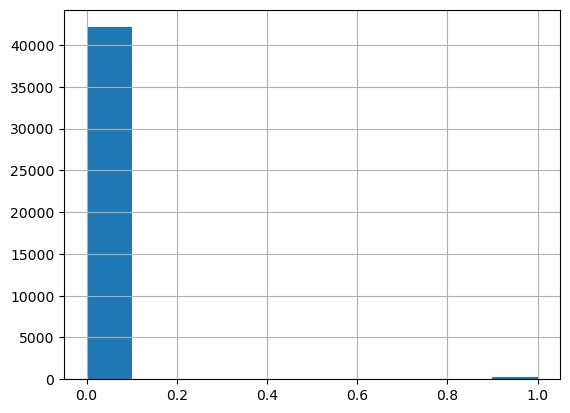

In [17]:
std_modeling['worthy'].hist()